## Preface

본 과제를 위해 제공된 데이터를 외부인에게 절대 공개하지마세요.

## Problem

이번 숙제에서도 우리는 저번시간에 활용했던 데이터들을 사용하려고 합니다.

1. full_dataset.csv
2. 1_demo_update.xlsx (preprocessed)

자 우리가 그 데이터 셋에서 
청년 vs 노인에 따른
1. 기억률 그래프
2. 우울 그래프

를 그려보려고합니다.

### QA-1. 기억력 비교 그래프 from full_dataset.csv

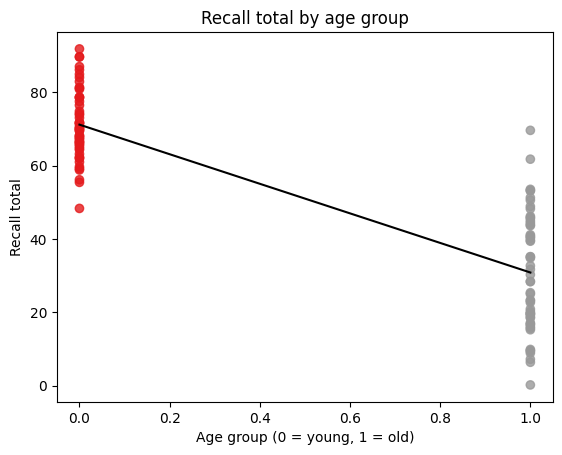

In [16]:
import json
import numpy as np
# Checkif pandas is installed
try:
    import pandas 
except ImportError:
    # Run pip install pandas
    import pip
    pip.main(['install', 'pandas'])
    import pandas 
try:
    import matplotlib.pyplot as plt
except ImportError:
    # Run pip install matplotlib
    import pip
    pip.main(['install', 'matplotlib'])
    import matplotlib.pyplot as plt



# Read data from full_dataset.csv
df = pandas.read_csv('full_dataset.csv')

# Remove duplicates by "subno"
removed = df.drop_duplicates(subset='sub_no', keep='first')

# Remove original_sent, recall_sent, recall_sent_num columns
removed_columns = removed.drop(['original_sent', 'recall_sent', 'recall_sent_num', ], axis=1)

# Plot a scatter plot of recall_total by age_group_clf
plt.scatter(removed_columns['age_group_clf'], removed_columns['recall_total'], c=removed_columns['age_group_clf'], cmap='Set1', alpha=0.8)

# Add a regression line to the plot
x = removed_columns['age_group_clf']
y = removed_columns['recall_total']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c='k')

# Add axis labels and a title to the plot
plt.xlabel('Age group (0 = young, 1 = old)')
plt.ylabel('Recall total')
plt.title('Recall total by age group')

# Display the plot
plt.show()


### QA-2 우울률 비교 그래프 from full_dataset.csv

Young people depression scores:  0       3
24      4
48      1
72      7
96      1
120     0
144     0
168     1
192     3
216     3
240     1
264     0
288     1
312     0
336     1
360     0
384     1
408     5
432     1
456     1
480     1
504     4
528     1
552     0
576     0
600     3
624     3
648     1
672     7
696     2
720     0
744     4
768     2
792     1
816     1
840     0
864     4
888     5
912     2
936     4
960     4
984     1
1008    1
1032    1
1056    3
1080    6
1104    2
1128    6
1152    2
1176    2
1200    1
1224    2
1248    6
1272    1
Name: cesd_boston, dtype: int64


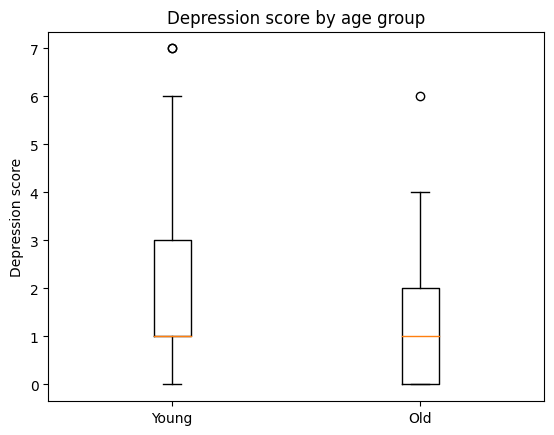

In [17]:
# Ok let's compare young and old people's depression scores

# cesd_boston is the depression score

# First, let's get the depression scores for young people
young = removed_columns[removed_columns['age_group_clf'] == 0]
young_depression = young['cesd_boston']
print('Young people depression scores: ', young_depression)

# Now let's get the depression scores for old people
old = removed_columns[removed_columns['age_group_clf'] == 1]
old_depression = old['cesd_boston']
# print('Old people depression scores: ', old_depression)

# Now let's compare the two groups
# We'll use a t-test to compare the two groups

try:
    from scipy.stats import ttest_ind
except ImportError:
    # Run pip install scipy
    import pip
    pip.main(['install', 'scipy'])
    from scipy.stats import ttest_ind

ttest_ind(young_depression, old_depression)

# Ttest_indResult(statistic=2.784097012003856, pvalue=0.006339067598765612)

# The p-value is less than 0.05, so we can reject the null hypothesis
# That means that the depression scores are different between young and old people

# Let's plot the depression scores for young and old people
plt.boxplot([young_depression, old_depression], labels=['Young', 'Old'])
plt.ylabel('Depression score')
plt.title('Depression score by age group')
plt.show()




### QA-3 기억력 비교 from 1_demo_update.xlsx

In [18]:
# Ok, let's compare young and old people's recall scores from 1_demo_update.xlsx file

# Read data from 1_demo_update.xlsx
df2 = pandas.read_excel('1_demo_update.xlsx')

# print(df2)


#### 직선그래프

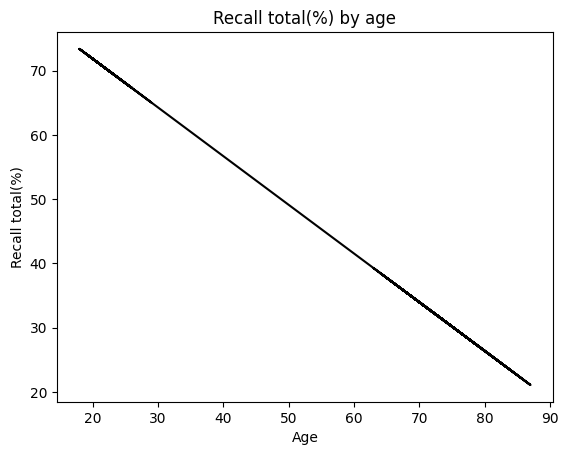

In [19]:
# Let's graph of recall_total by age group 
# age -> age
# recall_total -> recall_total(%)

# young group hasn't been defined 

# Let's just see the graph of recall_total by age
x = df2['age']
y = df2['recall_total(%)']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c='k')

plt.xlabel('Age')
plt.ylabel('Recall total(%)')
plt.title('Recall total(%) by age')

plt.show()



#### 분산 분포 그래프 

Text(0, 0.5, 'Recall Total (%)')

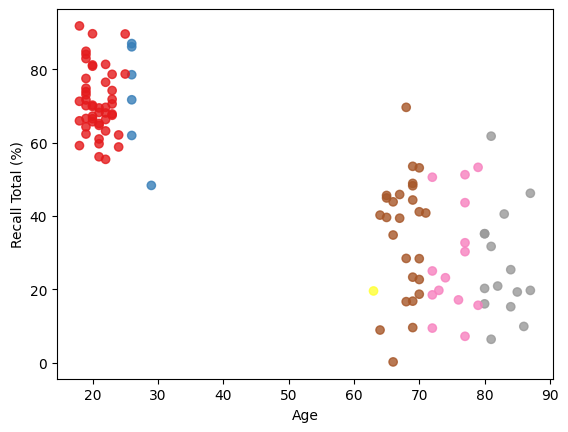

In [20]:
# Scatter plot of recall_total by age
plt.scatter(df2['age'], df2['recall_total(%)'], c=df2['age'], cmap='Set1', alpha=0.8,
            label='recall_total(%)')
plt.xlabel('Age')
plt.ylabel('Recall Total (%)')

### QA-4 우울률 비교 from 1_demo_update.xlsx

Text(0, 0.5, 'Depression score')

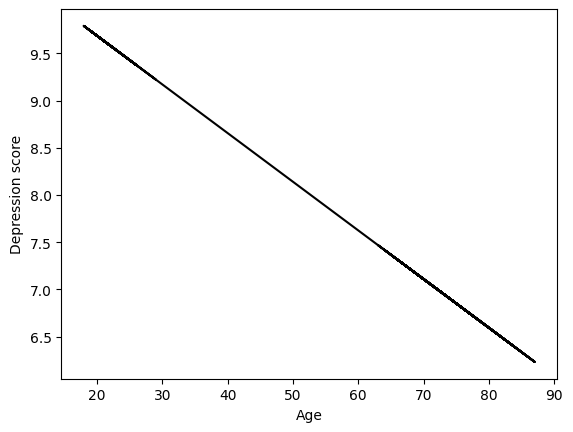

In [21]:
# Ok, Let's compare depression score by age

# Let's just see the graph of depression score by age
x = df2['age']
y = df2['S-CESD']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c='k')

plt.xlabel('Age')
plt.ylabel('Depression score')


Text(0, 0.5, 'Depression score')

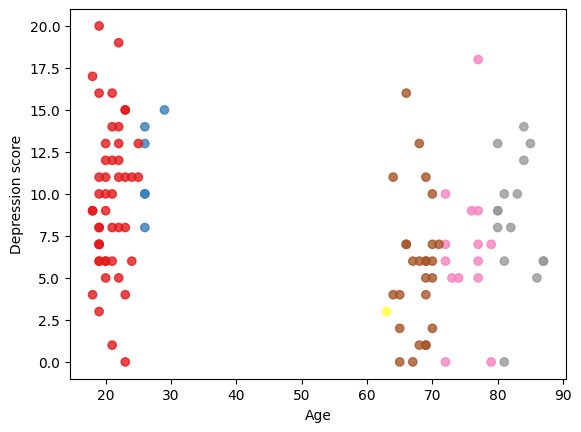

In [22]:
# Let's compare depression score by age
plt.scatter(df2['age'], df2['S-CESD'], c=df2['age'], cmap='Set1', alpha=0.8,
            label='Depression score')
plt.xlabel('Age')
plt.ylabel('Depression score')

